In [ ]:
!pip install pydicom

In [108]:
drive_folder = '/Users/berga/Google Drive/Shared drives/Contrast-AI/Test Images/Raw/CASE_001*/*.DCM'
preprocessed_drive_folder = '/Users/berga/Google Drive/Shared drives/Contrast-AI/Test Images/Processed/CASE_001*/*.DCM'

In [37]:
from contrast_ai.preprocessing import read_dicom
import pydicom

dcm = pydicom.dcmread('/Users/berga/Google Drive/Shared drives/Contrast-AI/Test Images/Raw/CASE_001_raw/I010001.DCM')

In [38]:
type(dcm)

pydicom.dataset.FileDataset

In [65]:
from contrast_ai.preprocessing import read_dicom
from glob import glob


from tqdm import tqdm
def get_data(folder):
    data = []
    for i, file in tqdm(enumerate(glob(folder))):
        img = read_dicom(file)
        data.append((file.split('/')[-1], img))
        if i == 10:
            break
    return data


In [31]:
import matplotlib.pyplot as plt

def show_images(data):
    # show image using current image resolution with figsize
    for i in range(min(len(data), 10)):
        plt.figure(figsize=(10, 10))
        file, img = data[i]
        plt.imshow(img, cmap='gray')
        plt.title(file)
        plt.show()

In [39]:
import matplotlib.pyplot as plt

def show_images_side_by_side(data1, data2):
    data1 = sorted(data1, key=lambda x: x[0])
    data2 = sorted(data2, key=lambda x: x[0])
    N = min(len(data1), 10)
    # create grid 2x10
    fig, axs = plt.subplots(N, 2, figsize=(10, 10*N))
    for i in range(N):
        file, img = data1[i]
        axs[i, 0].imshow(img, cmap='gray')
        axs[i, 0].set_title(file)
    for i in range(N):
        file, img = data2[i]
        axs[i, 1].imshow(img, cmap='gray')
        axs[i, 1].set_title(file)
    plt.show()


In [109]:
raw_data = get_data(drive_folder)
processed_data = get_data(preprocessed_drive_folder)

8it [00:00, 72.73it/s]
8it [00:00, 76.67it/s]


In [ ]:
# show_images_side_by_side(data, processed_data)

In [94]:
import matplotlib.pyplot as plt

def show_images_grid(data1, data2, case='?'):
    data = data1+data2
    data = sorted(data, key=lambda x: x[0])
    print(len(data))

    from math import sqrt
    # create grid 2x10
    # N = int(sqrt(len(data)))+1
    fig, axs = plt.subplots(4, 4, figsize=(20, 20))


    # tight
    # plt.tight_layout()
    # more tight
    plt.subplots_adjust(wspace=0.15,
                        hspace=0.15)


    # Needed to add spacing between 1st and 2nd row
    # Add a margin between the main title and sub-plots
    # fig.subplots_adjust(hspace=0.4, top=0.85)

    # Add the main title
    fig.suptitle("patient ID: " + case, fontsize=15)


    first_column, data = data[:4], data[4:]

    for i in range(min(len(first_column), 4)):
        file, img = first_column[i]
        # scale img
        img = img[::8, ::8]
        axs[i, 0].imshow(img, cmap='gray')
        axs[i, 0].set_title(file)
        # hide axis label
        axs[i, 0].axis('off')


    for i in range(min(len(data), 12)):
        file, img = data[i]
        axs[i // 3, i % 3 + 1].imshow(img, cmap='gray')
        axs[i // 3, i % 3 + 1].set_title(file)
        # hide axis label
        axs[i // 3, i % 3 + 1].axis('off')

    plt.show()


array([[16383, 16383, 16383, ..., 16383, 16383, 16383],
       [16383, 16383, 16383, ..., 16383, 16383, 16383],
       [16383, 16383, 16383, ..., 16383, 16383, 16383],
       ...,
       [16383, 16383, 16383, ..., 16383, 16383, 16383],
       [16383, 16383, 16383, ..., 16383, 16383, 16383],
       [16383, 16383, 16383, ..., 16383, 16383, 16383]], dtype=uint16)

In [119]:
def show_single(img):
    plt.figure(figsize=(15, 15))
    plt.imshow(img, cmap='gray')
    plt.show()

6430

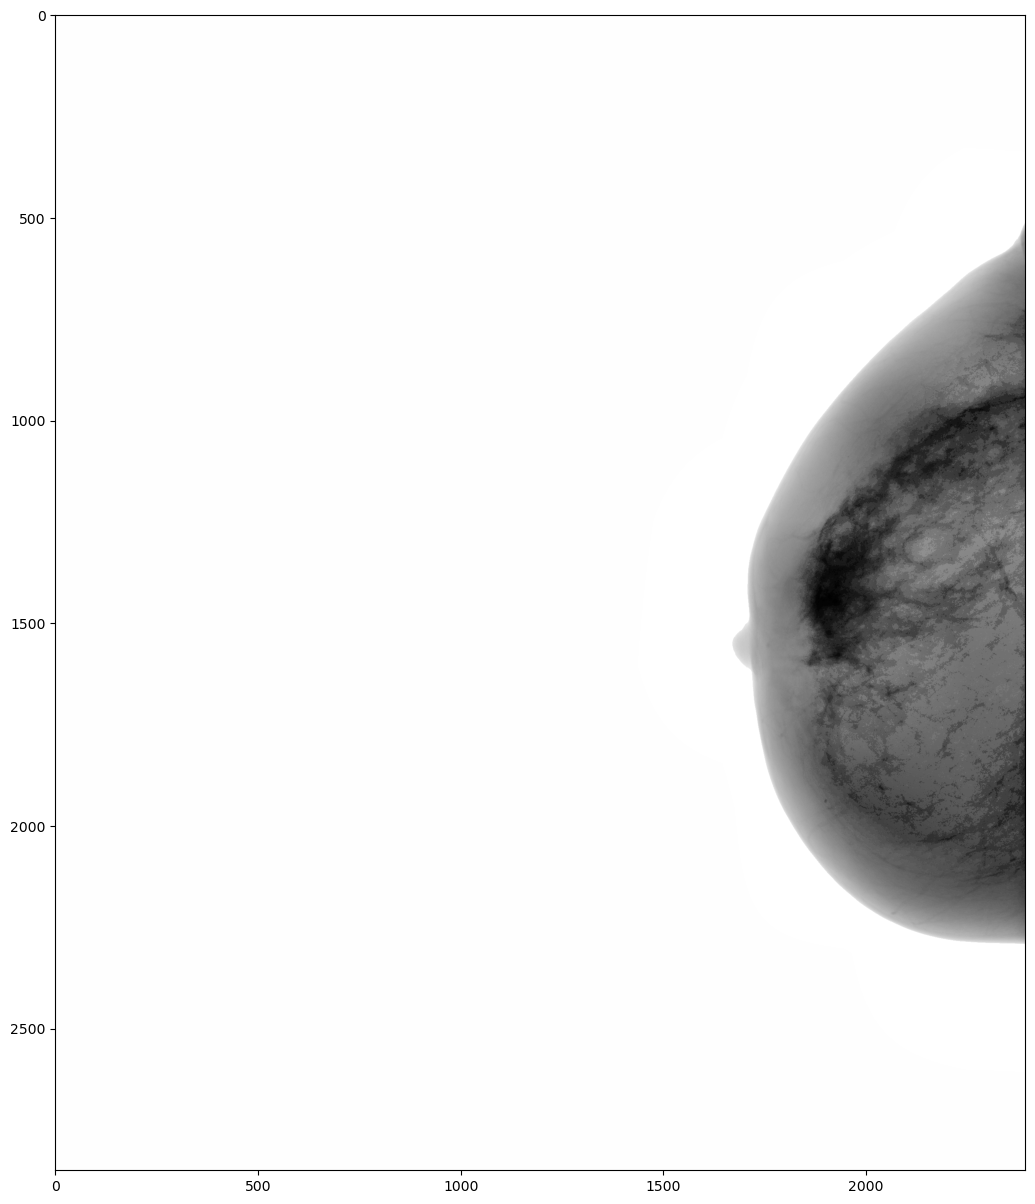

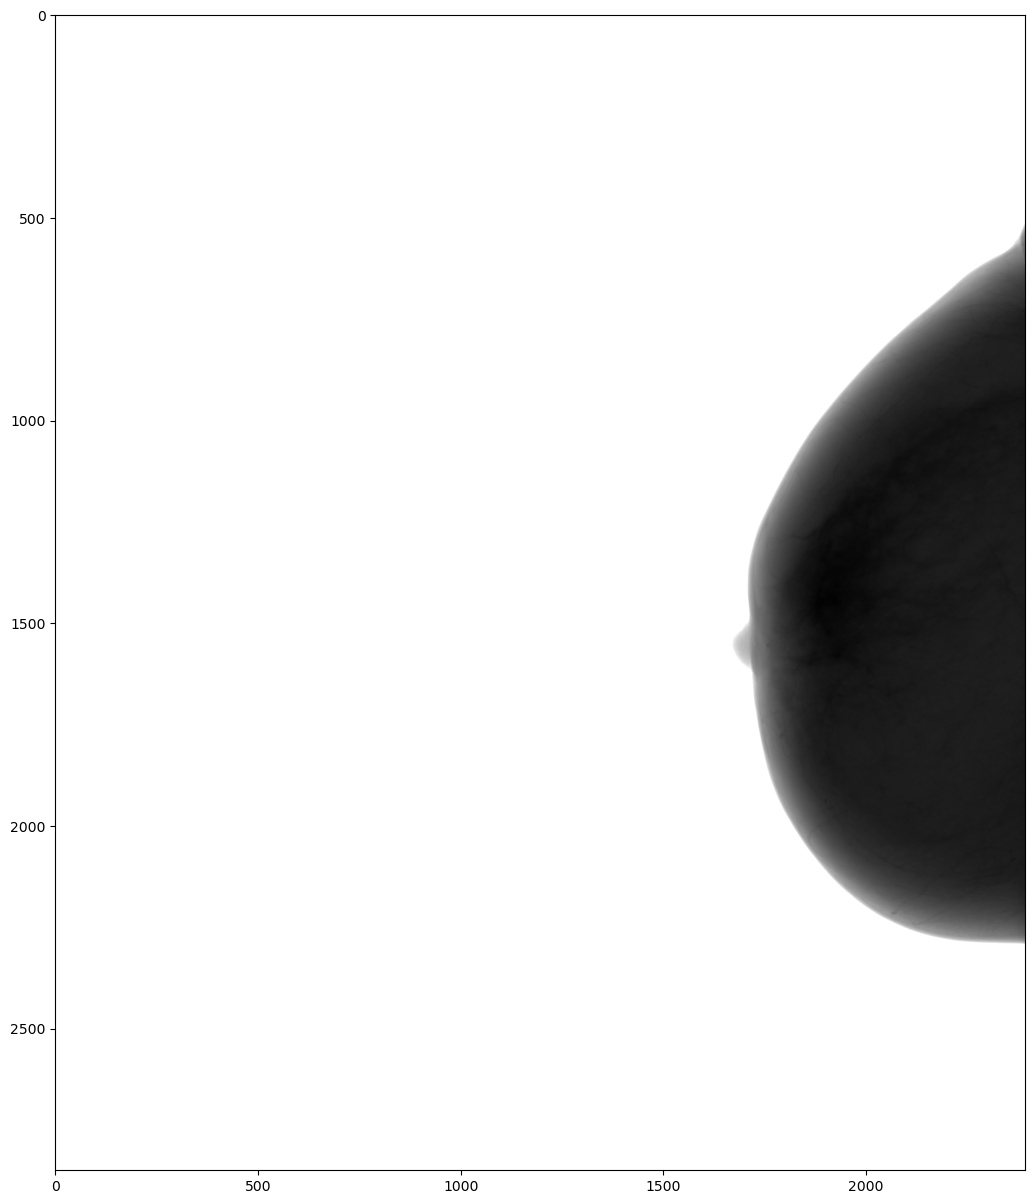

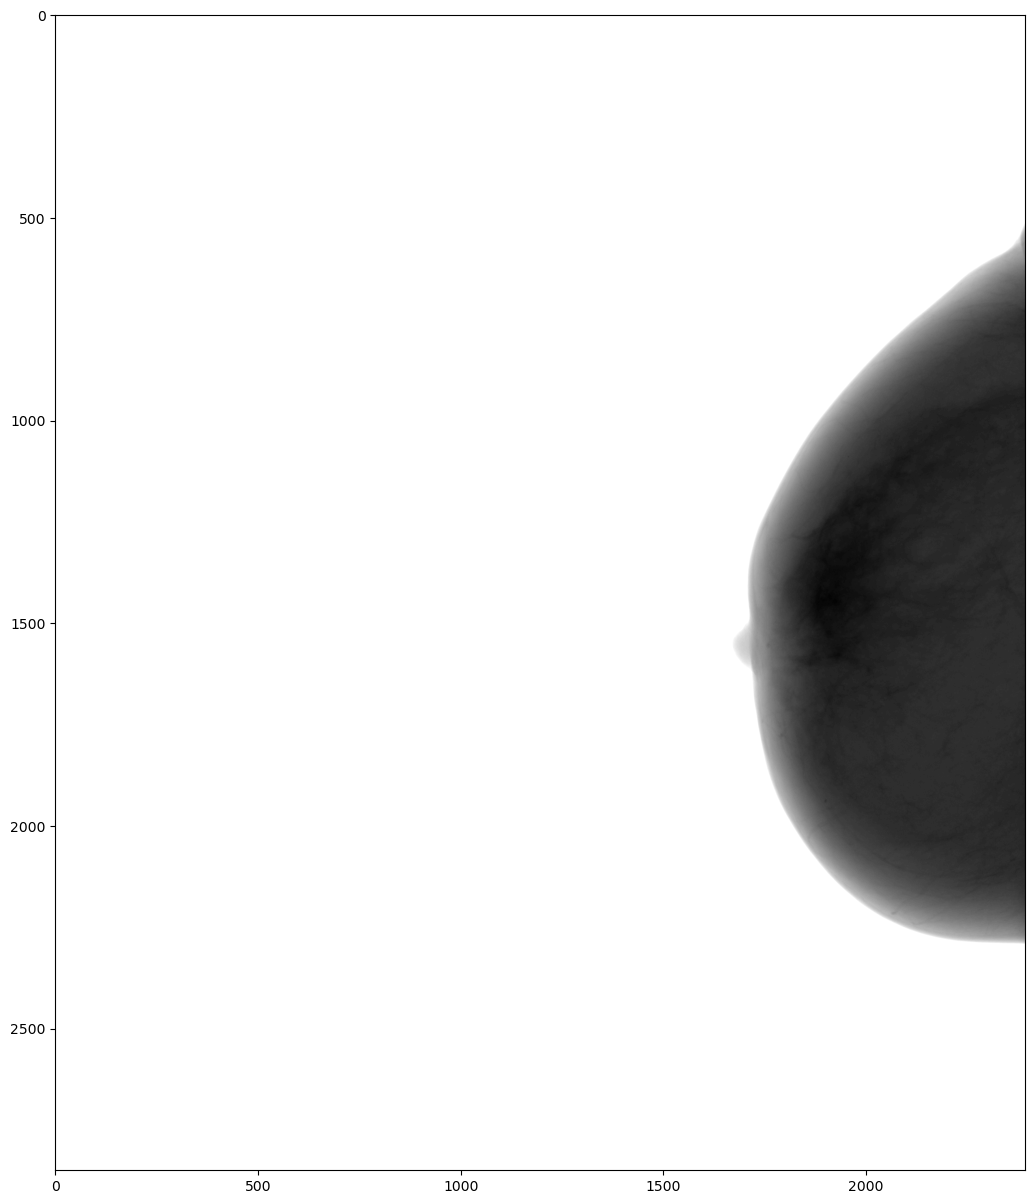

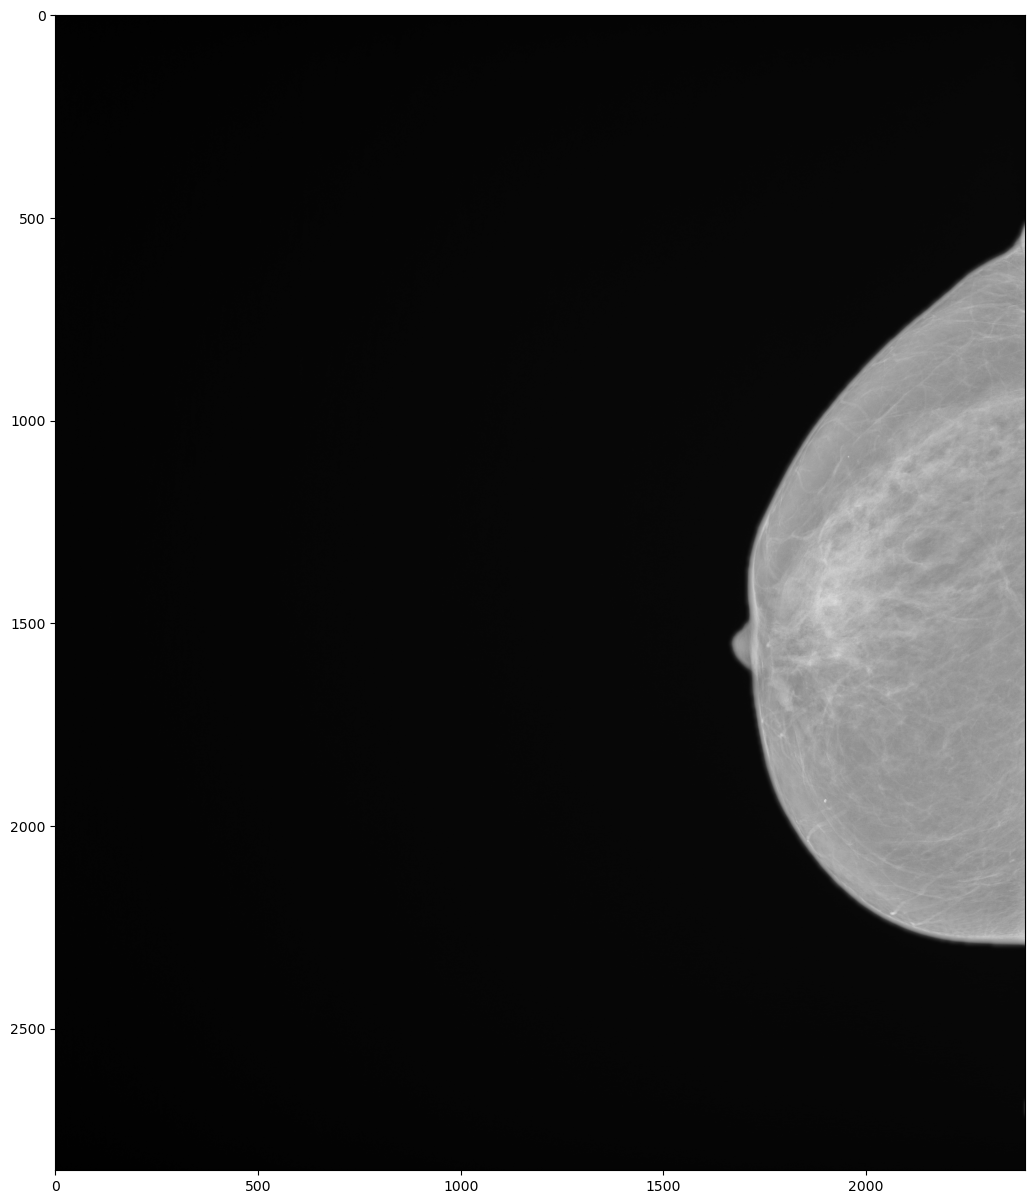

In [135]:

import numpy as np

data = raw_data+processed_data
data = sorted(data, key=lambda x: x[0])

raw_img = data[5][1]
contrast_img = data[6][1]
gamma = 1000

# apply a gamma transformation to data
img_normalized = raw_img.astype('float') / 2**14

# apply a gamma transformation to data
img_gamma = np.power(img_normalized, 1.0 / gamma)

img_gamma = np.uint16(img_gamma * (2**16))

# make img_gamma better by increasing contrast
from skimage import exposure
new_contrast_img = exposure.equalize_adapthist(img_gamma, clip_limit=0.1)


show_single(new_contrast_img)


show_single(raw_img)
show_single(img_gamma)
show_single(contrast_img)


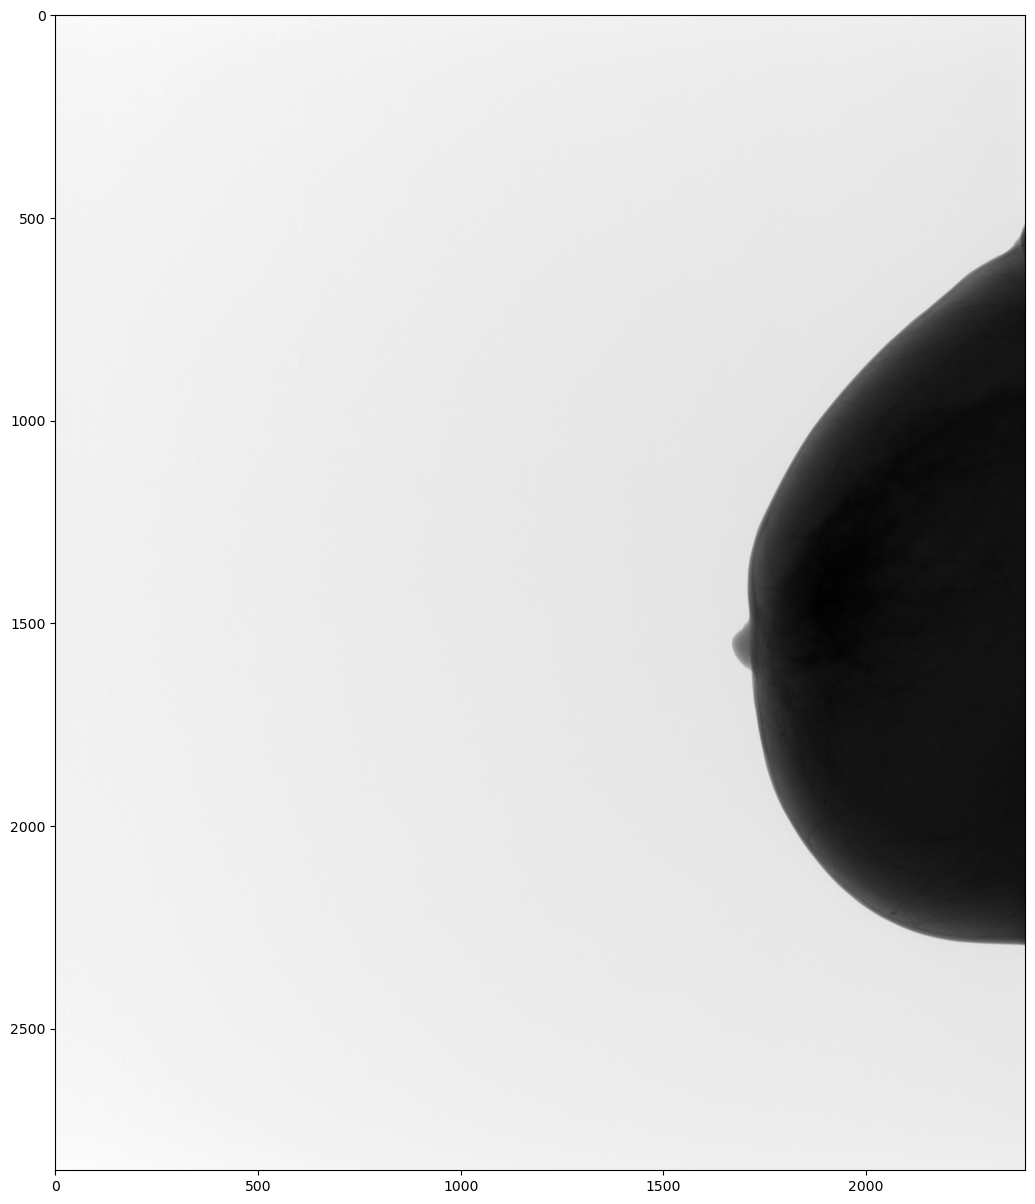

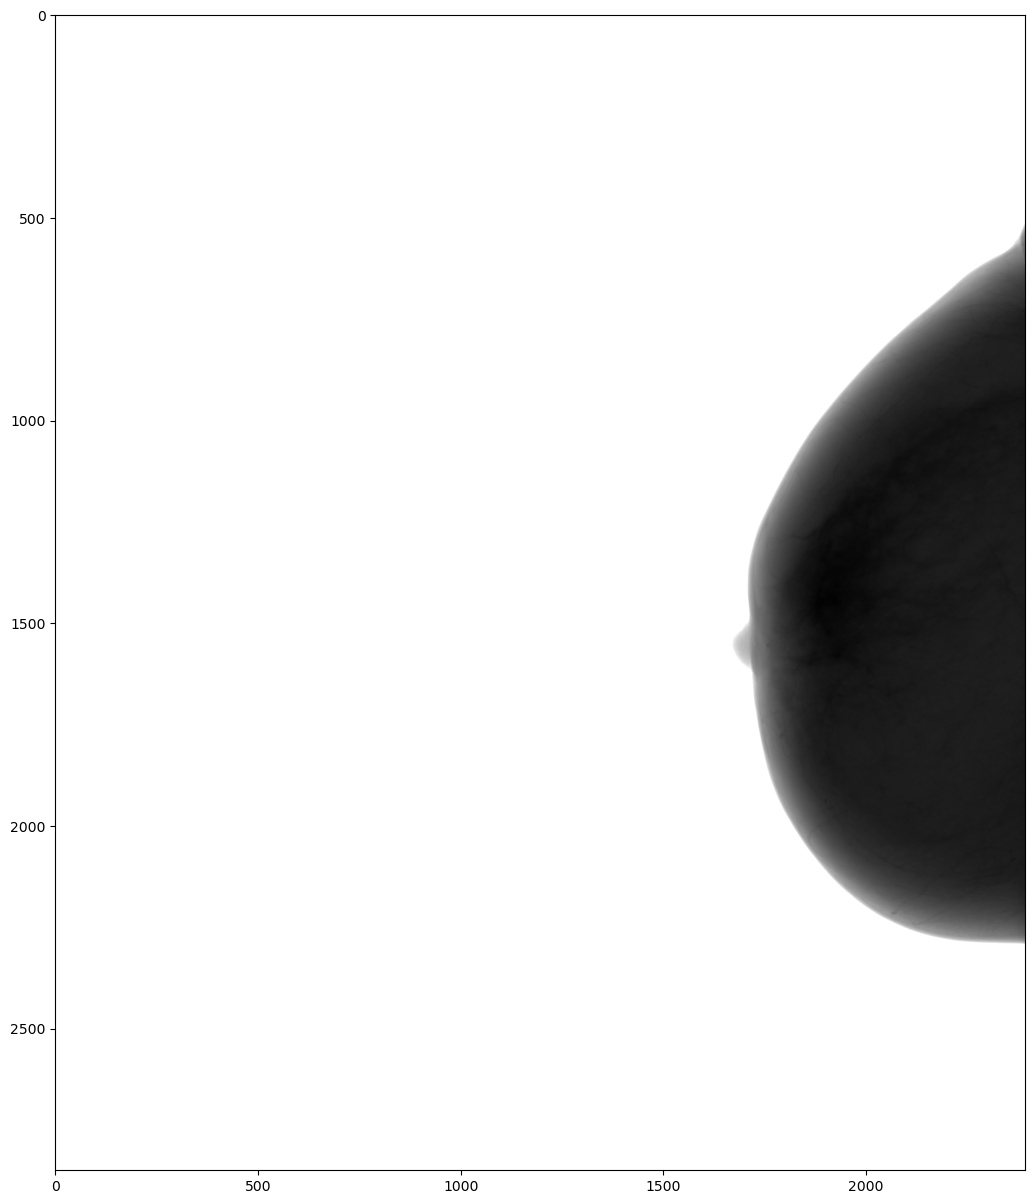

In [133]:
second_col_img = data[4][1]
third_col_img = data[5][1]

show_single(second_col_img)
show_single(third_col_img)


18


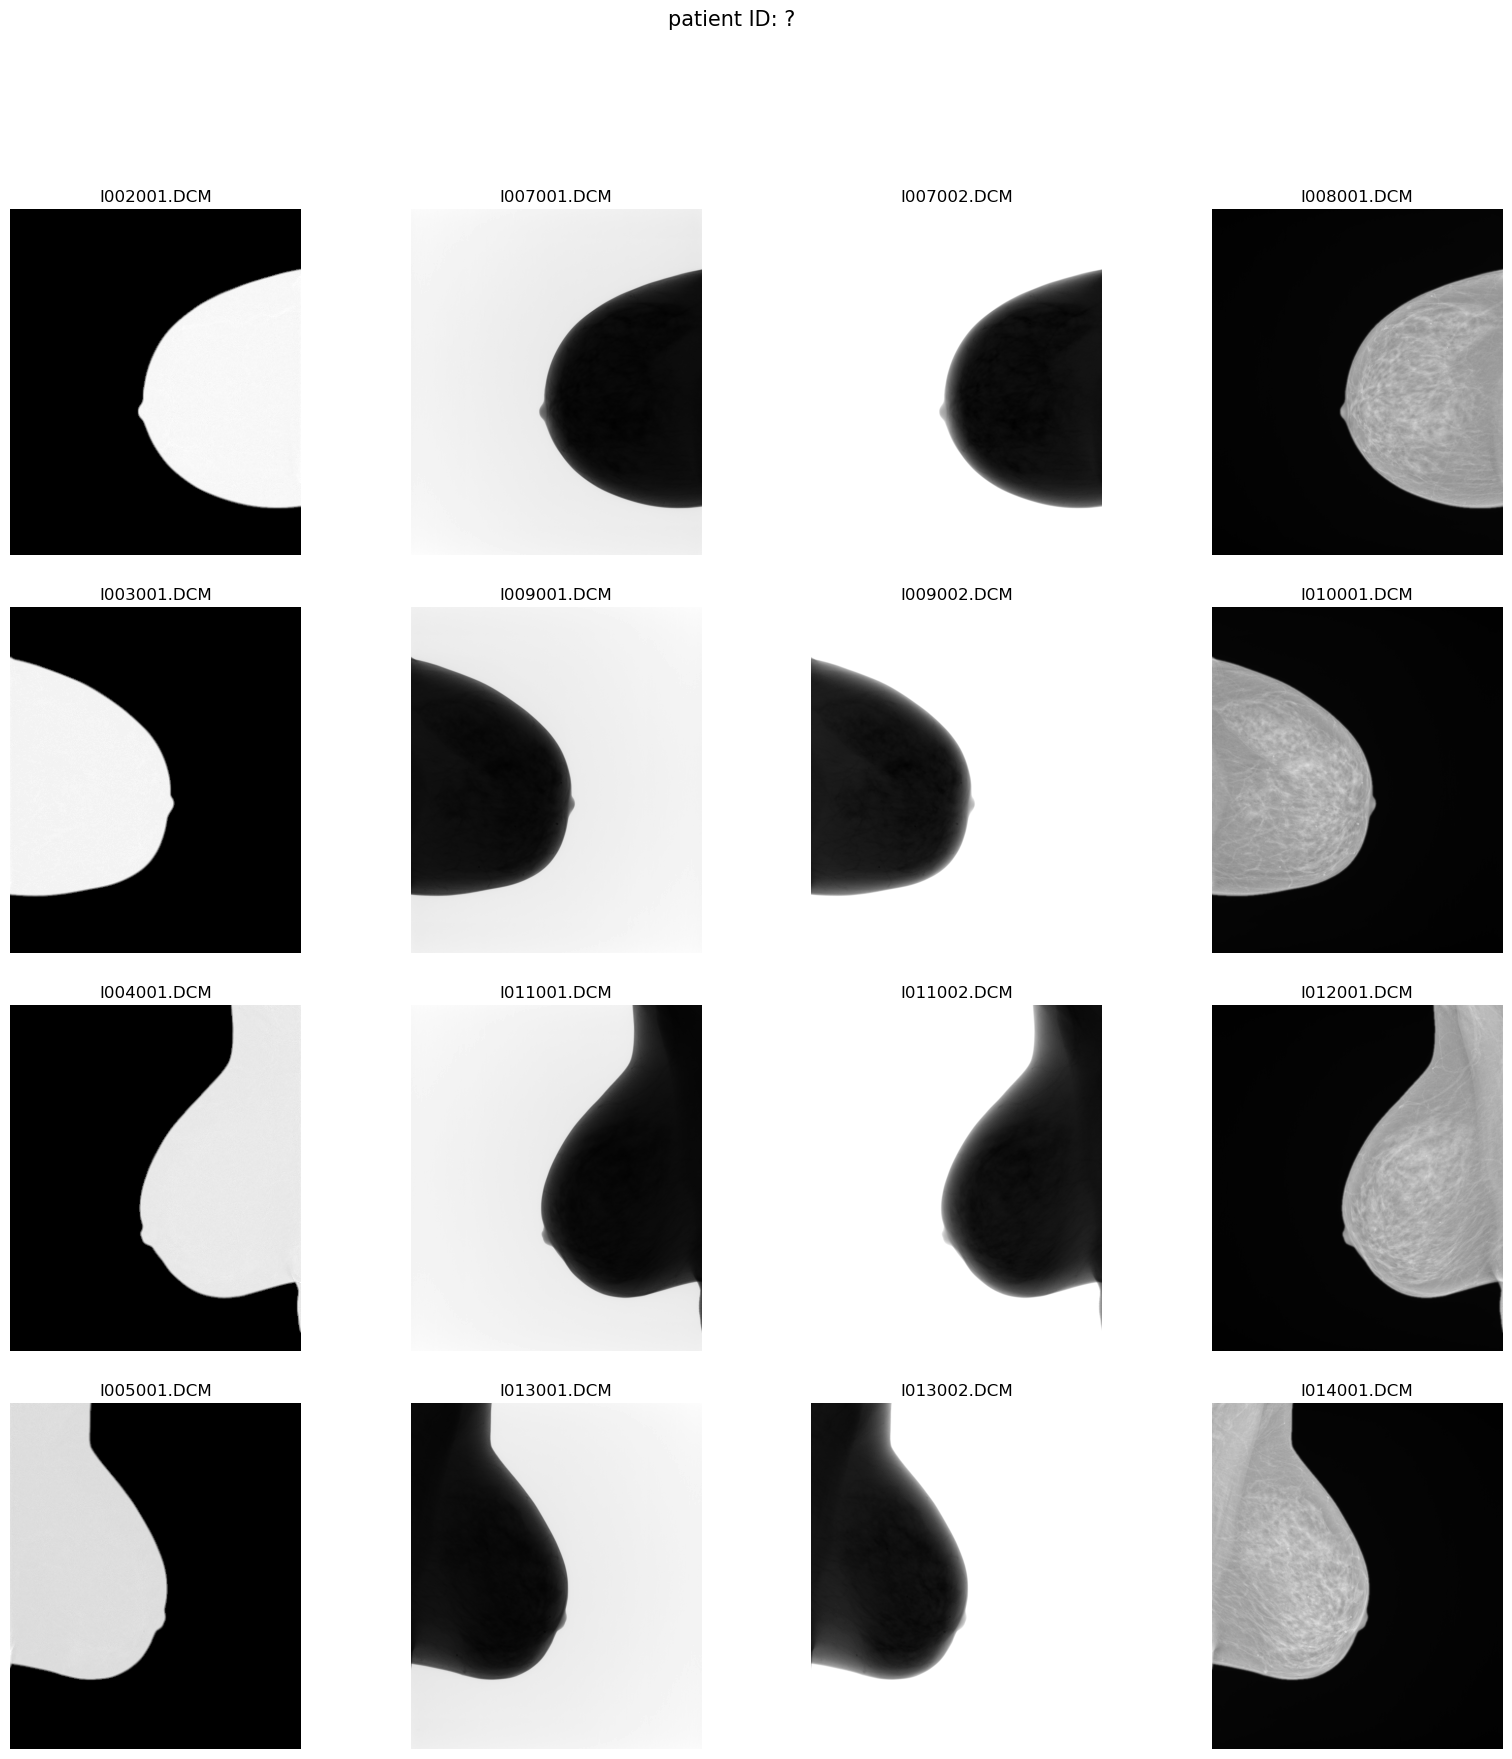

In [95]:
show_images_grid(data, processed_data)

10it [00:00, 58.47it/s]
8it [00:00, 84.52it/s]


18


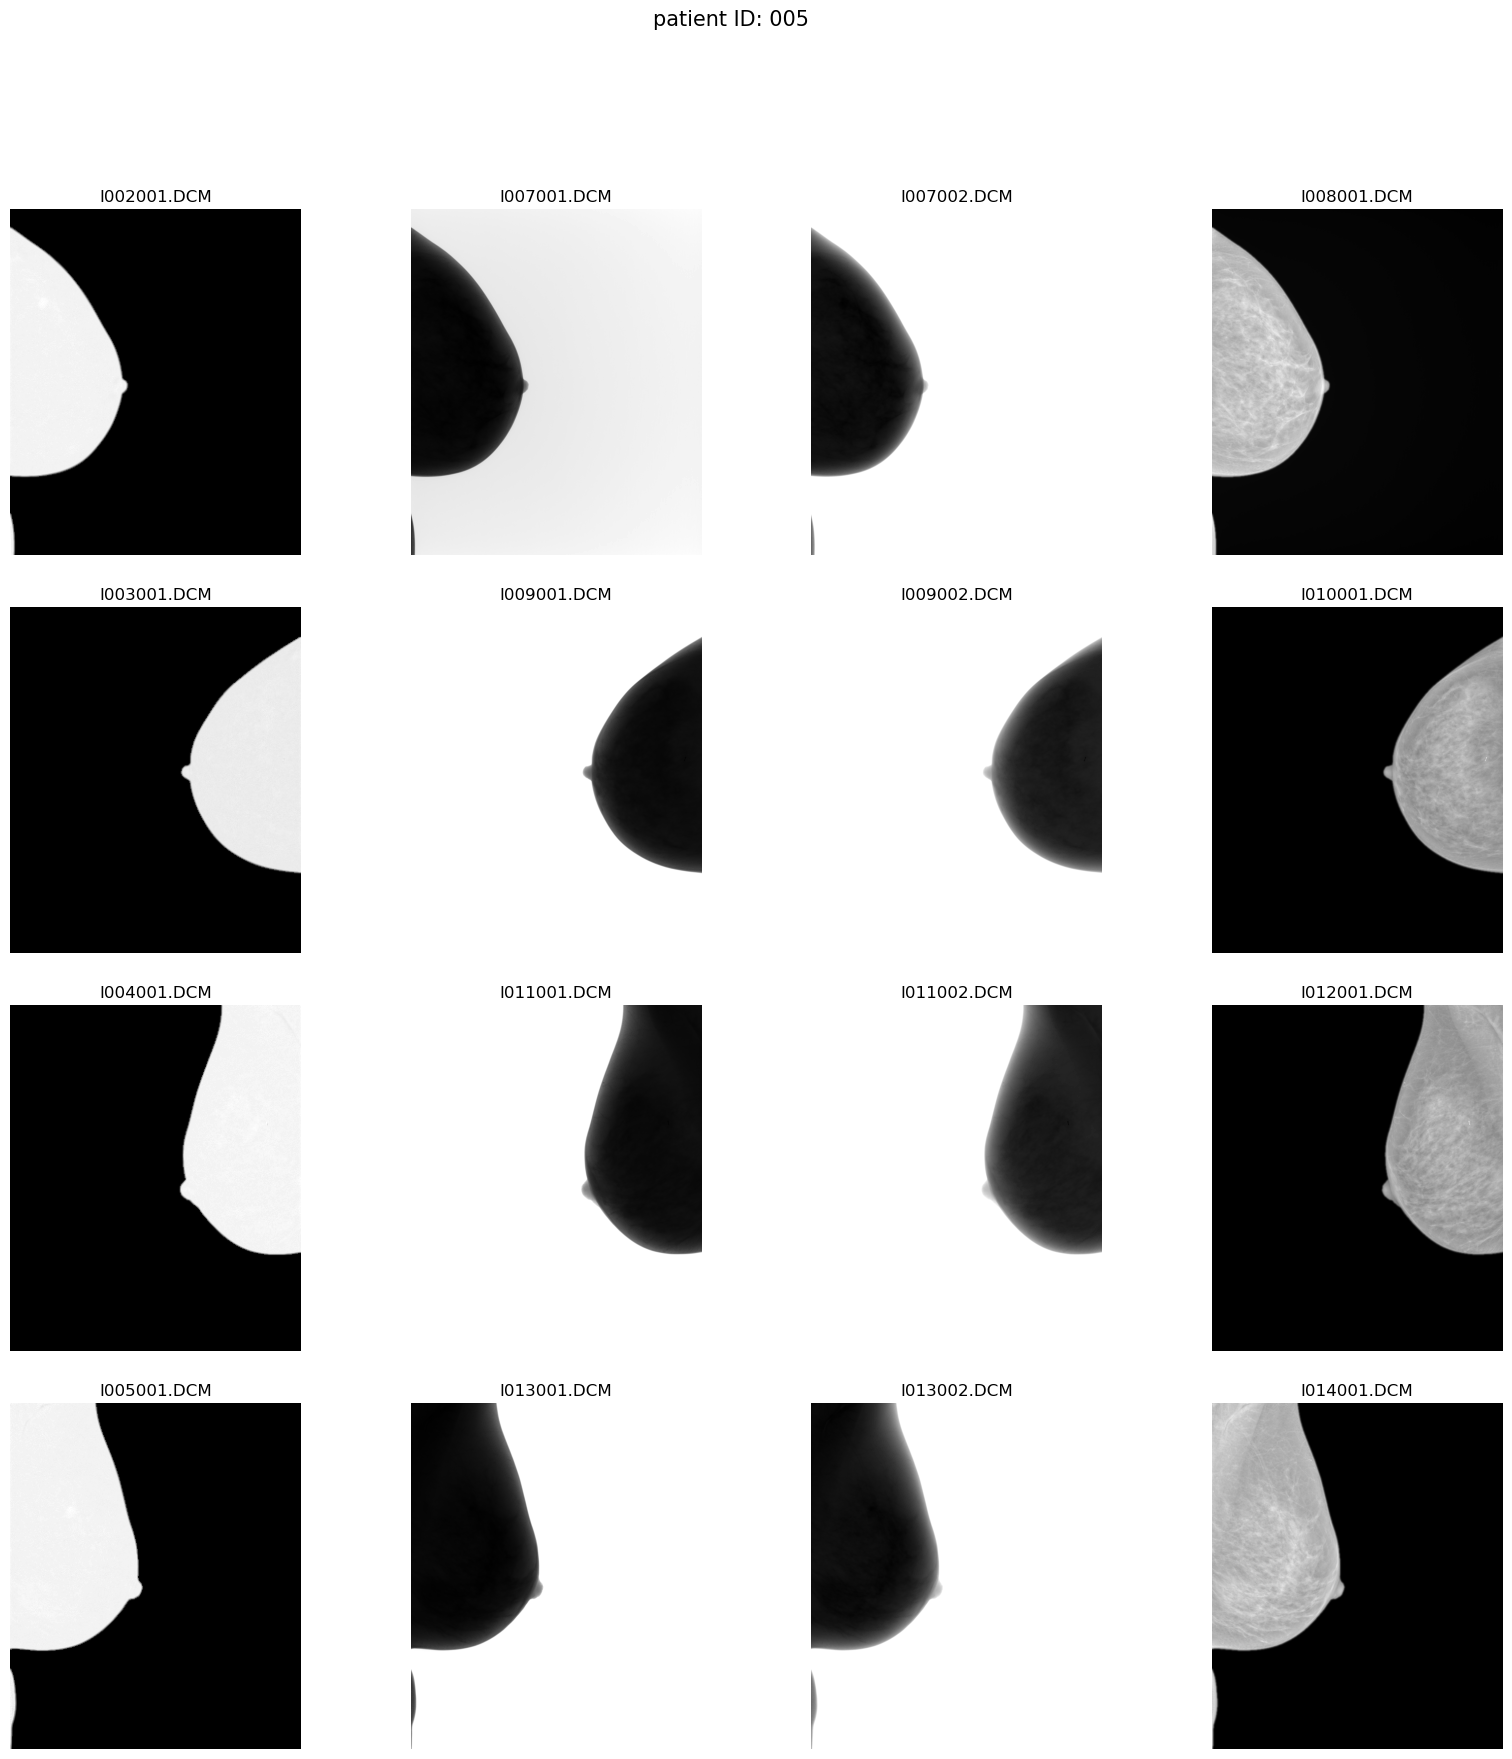

8it [00:00, 83.05it/s]
8it [00:00, 86.56it/s]


16


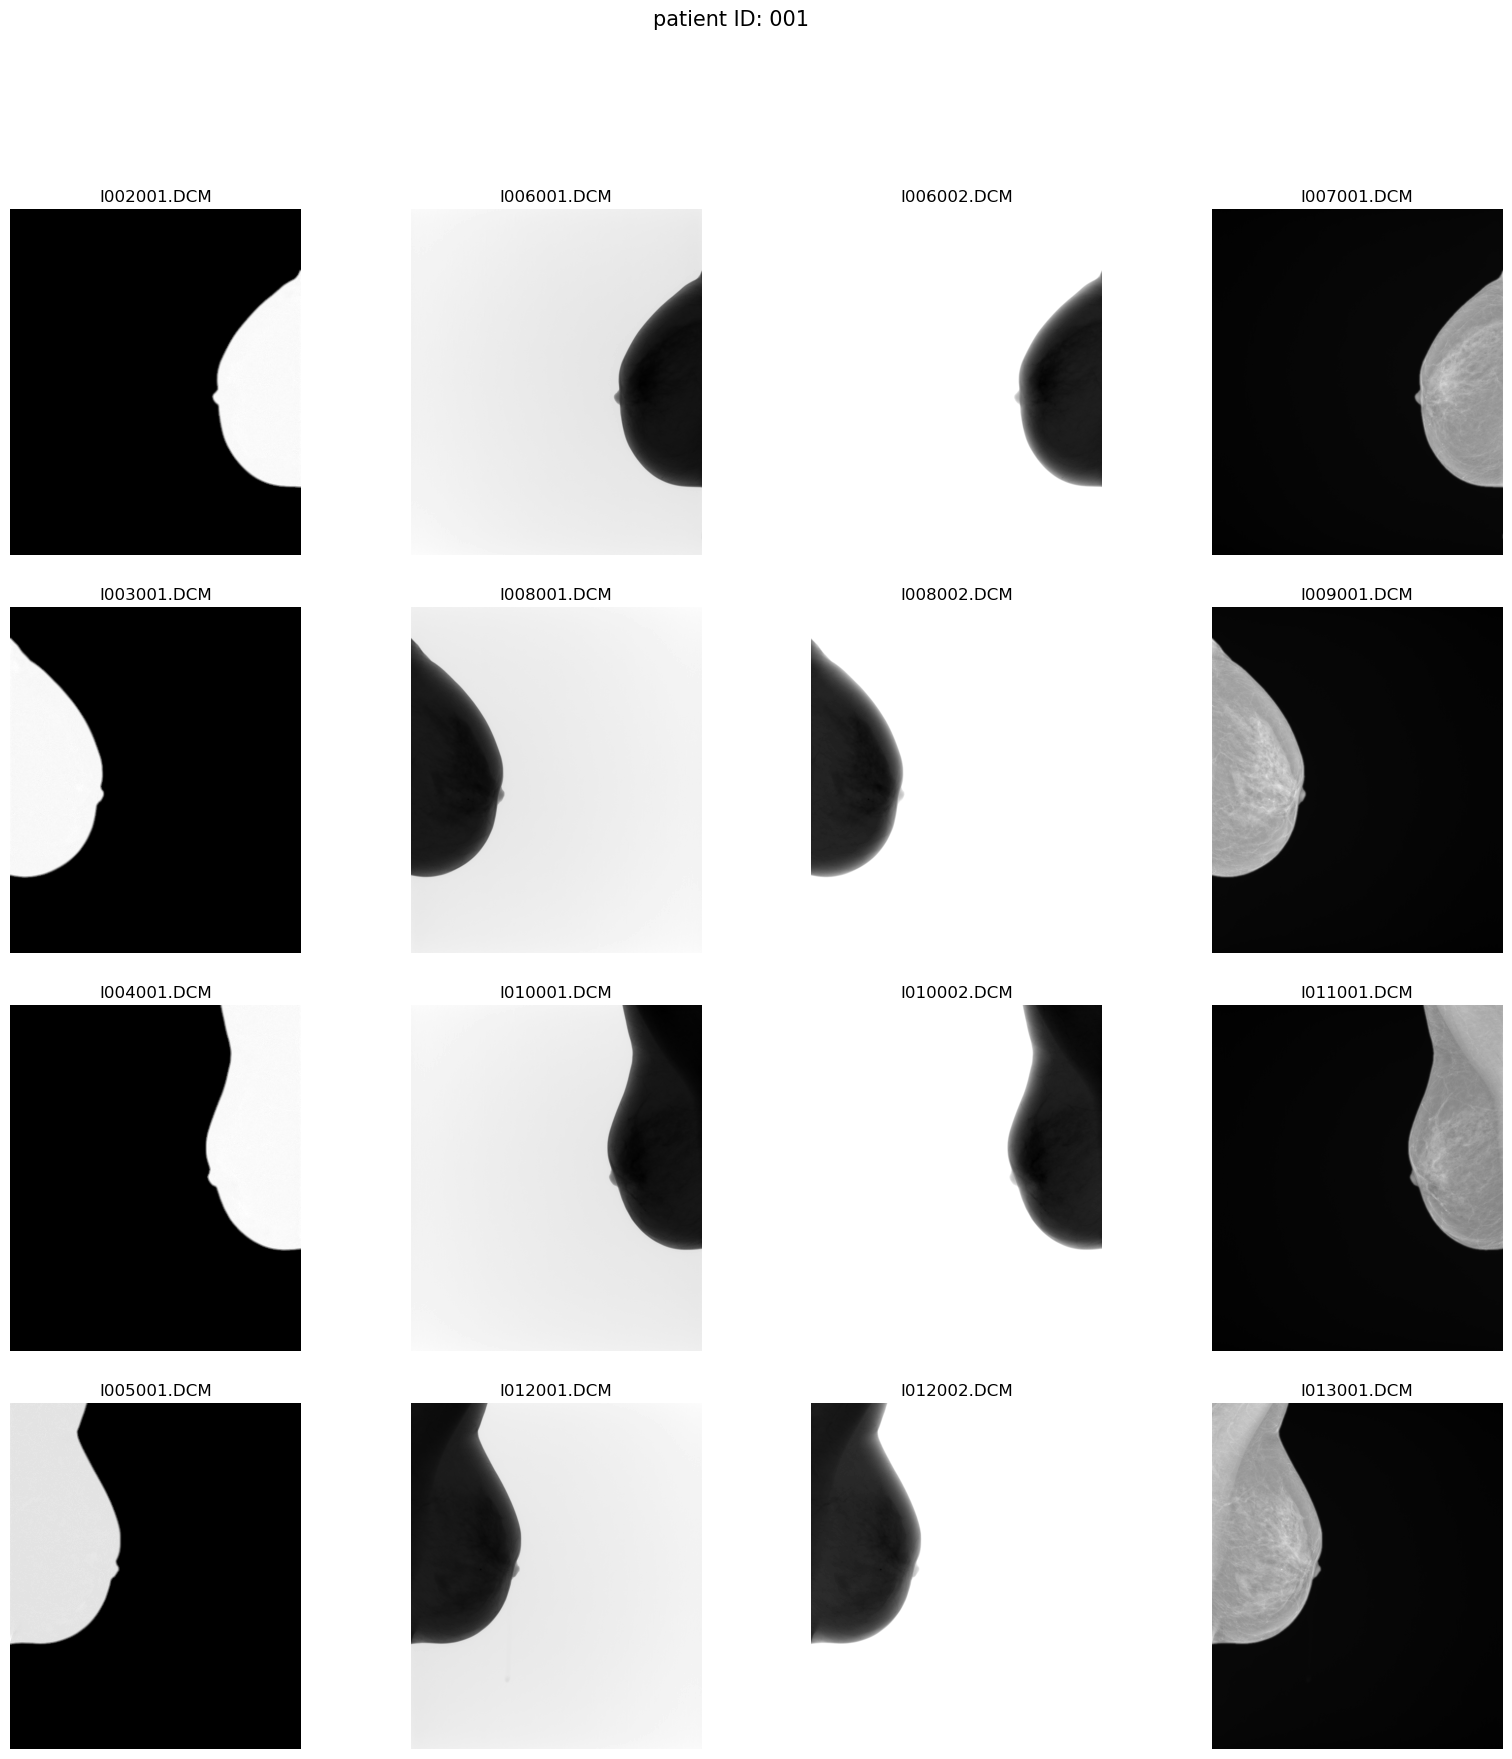

In [134]:
for case in ['005', '001']:
    drive_folder = f'/Users/berga/Google Drive/Shared drives/Contrast-AI/Test Images/Raw/CASE_{case}*/*.DCM'
    processed_drive_folder = f'/Users/berga/Google Drive/Shared drives/Contrast-AI/Test Images/Processed/CASE_{case}*/*.DCM'
    data = get_data(drive_folder)
    processed_data = get_data(processed_drive_folder)

    show_images_grid(data, processed_data, case=case)


In [ ]:
show_images(data)

In [ ]:
show_images(preprocessed_imgs)